# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [7]:
athletes.describe().round(2)

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.00,10879.00,11538.00,11538.00,11538.00
mean,4.999885e+08,1.77,72.07,0.06,0.06,0.06
std,2.908648e+08,0.11,16.18,0.26,0.24,0.24
min,1.834700e+04,1.21,31.00,0.00,0.00,0.00
25%,2.450997e+08,1.69,60.00,0.00,0.00,0.00
50%,5.002011e+08,1.76,70.00,0.00,0.00,0.00
75%,7.539874e+08,1.84,81.00,0.00,0.00,0.00
max,9.999878e+08,2.21,170.00,5.00,2.00,2.00


In [8]:
athletes.isnull().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [9]:
height_sample = get_sample(athletes, 'height', n=3000, seed=42)
height_sample

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
         ... 
1483     1.75
2586     1.78
2949     1.60
10268    1.75
5892     1.76
Name: height, Length: 3000, dtype: float64

In [10]:
shapiro_stat, shapiro_p_valor = sct.shapiro(height_sample)
print('O valor da estatistica de Shapiro-Wilk é:' + str(shapiro_stat))
print('O valor de p_valor de Shapiro-Wilk é:' + str(shapiro_p_valor))

O valor da estatistica de Shapiro-Wilk é:0.9961519837379456
O valor de p_valor de Shapiro-Wilk é:5.681722541339695e-07


In [11]:
significance = 0.05

In [12]:
shapiro_p_valor <= significance

True

In [13]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return bool(shapiro_p_valor > significance)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

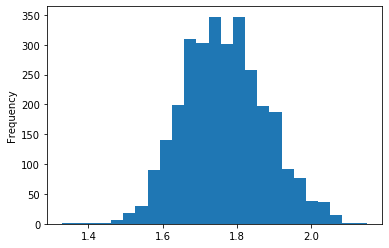

In [14]:
height_sample.plot(kind = 'hist', bins = 25)

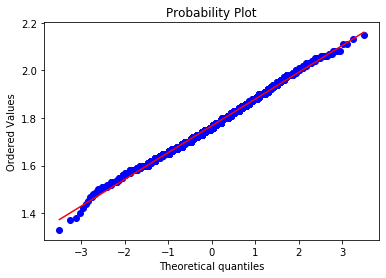

In [15]:
sct.probplot(height_sample, plot=plt)
plt.show()

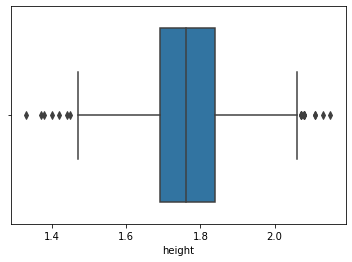

In [16]:
sns.boxplot(height_sample)

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [17]:
shapiro_stat_jb, shapiro_p_valor_jb = sct.jarque_bera(height_sample)
print('O valor da estatistica de Shapiro-Wilk é:' + str(shapiro_stat_jb))
print('O valor de p_valor de Shapiro-Wilk é:' + str(shapiro_p_valor_jb))

O valor da estatistica de Shapiro-Wilk é:13.03363513594265
O valor de p_valor de Shapiro-Wilk é:0.001478366424594868


In [18]:
shapiro_p_valor_jb <= significance

True

In [19]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return bool (shapiro_p_valor_jb > significance)

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [20]:
weight_sample = get_sample(athletes, 'weight', n=3000, seed=42)
weight_sample

2162      80.0
3450      70.0
6886      69.0
3871      66.0
6383      82.0
         ...  
11255     63.0
9790      61.0
4127     125.0
463       54.0
6664      62.0
Name: weight, Length: 3000, dtype: float64

In [21]:
person_stat, person_p_valor = sct.normaltest(weight_sample)
print('O valor da estatistica de DAgostino-Pearson é:' + str(person_stat))
print('O valor de p_valor de DAgostino-Pearson é:' + str(person_p_valor))

O valor da estatistica de DAgostino-Pearson é:510.24655809881176
O valor de p_valor de DAgostino-Pearson é:1.5898922918029537e-111


In [22]:
significance

0.05

In [23]:
person_p_valor <= significance

True

In [24]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return bool(person_p_valor > significance)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

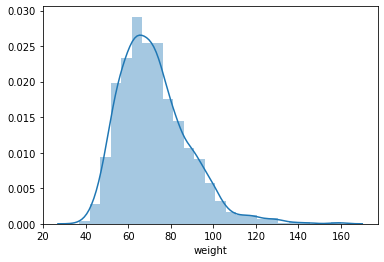

In [25]:
sns.distplot(weight_sample, bins = 25)

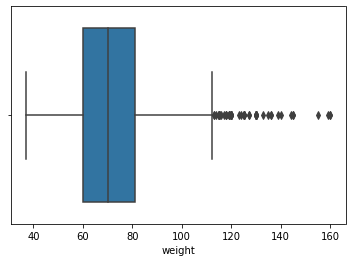

In [26]:
sns.boxplot(weight_sample)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [27]:
weight_sample_log = np.log(weight_sample)
weight_sample_log

2162     4.382027
3450     4.248495
6886     4.234107
3871     4.189655
6383     4.406719
           ...   
11255    4.143135
9790     4.110874
4127     4.828314
463      3.988984
6664     4.127134
Name: weight, Length: 3000, dtype: float64

In [28]:
person_stat_log, person_p_valor_log = sct.normaltest(weight_sample_log)
print('O valor da estatistica de DAgostino-Pearson é:' + str(person_stat_log))
print('O valor de p_valor de DAgostino-Pearson é:' + str(person_p_valor_log))

O valor da estatistica de DAgostino-Pearson é:45.91534331977353
O valor de p_valor de DAgostino-Pearson é:1.0705572101256944e-10


In [29]:
person_p_valor_log <= significance

True

In [30]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return bool (person_p_valor_log > significance)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [40]:
bra = athletes[(athletes.nationality == 'BRA')].height.dropna()
usa = athletes[(athletes.nationality == 'USA')].height.dropna()
can = athletes[(athletes.nationality == 'CAN')].height.dropna()

In [43]:
def q5():
    # Retorne aqui o resultado da questão 5.
    p_value = sct.ttest_ind(bra,usa)[1]
    return bool(p_value > 0.05)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [ ]:
def q6():
    # Retorne aqui o resultado da questão 6.
    _, p_value = sct.ttest_ind(bra, can,  equal_var=False)
    return bool(p_value > 0.05)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [ ]:
def q7():
    # Retorne aqui o resultado da questão 7.
    _, p_value = sct.ttest_ind(usa, can, equal_var=False)
    return float(p_value.round(8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?